In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset/Dataset/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [ ]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 115s 8s/step - loss: 0.6044 - accuracy: 0.6399 - val_loss: 0.4567 - val_accuracy: 0.7438
Epoch 2/5
14/14 [==============================] - 22s 2s/step - loss: 0.4510 - accuracy: 0.7982 - val_loss: 0.1476 - val_accuracy: 0.9669
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.2836 - accuracy: 0.8624 - val_loss: 0.1059 - val_accuracy: 0.9669
Epoch 4/5
14/14 [==============================] - 22s 2s/step - loss: 0.1872 - accuracy: 0.9381 - val_loss: 0.0305 - val_accuracy: 0.9917
Epoch 5/5
14/14 [==============================] - 26s 2s/step - loss: 0.2268 - accuracy: 0.8991 - val_loss: 0.1686 - val_accuracy: 0.9421


In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 4s 969ms/step


In [ ]:
predictions

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
predictions

121


In [ ]:
model.save("/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/forest")

In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [ ]:
model = load_model("/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/forest")

In [ ]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [ ]:
predictImage("/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg")

1/1 [==============================] - 0s 86ms/step
[[1.]]
 fire


In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 21.2 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=bfce702cf1be4f74268ac2c2c60ece6f19d57002215b675ca7d5b34b421df329
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/599857.jpg',target_size=(94,94))

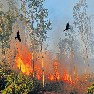

In [ ]:
img

In [ ]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [ ]:
#load the saved model
model = load_model(r'/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/forest')
#define video
video = cv2.VideoCapture('/content/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
#define the features
name = ['forest','with forest']

In [ ]:
account_sid = 'AC9261eb711254ff2902708b5f2e9107da'
auth_token = '6484cc70c8880fcc0k'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+1607535689',
         to='+917397109866'
     )

print(message.sid)